# 1(b.) (iii.) Unsupervised Learning

In [2]:
import pandas as pd
dataset = pd.read_csv('/Users/divyatmika/Desktop/Di/wdbc.csv')


In [3]:
print("No of rows:")
print(dataset.shape[0])
print("No of columns:")
print(dataset.shape[1])

No of rows:
569
No of columns:
32


In [7]:
malign_dataset = dataset.loc[dataset['Diag'] == 'M']
benign_dataset = dataset.loc[dataset['Diag'] == 'B']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from random import randint
from sklearn.cluster import KMeans

# A. How do you make sure that the algorithm was not trapped in a local minimum?
A bad initial choice of clusters may lead it to get trapped in a local minima, thus with different initial choices you may get trapped in different local minima yielding different clustering results. Therefore, it is hard to repeat the clustering results. Studies have shown that when the initial cluster centers are close to the final cluster centers, the clustering results improve. 
(i.) The order of complexity of their algorithm should remain linear in the number of data objects or else it is useless because K-mean is linear in the number of data objects.
(ii.)The method should be deterministic, i.e. it should not have elements of randomness in it because on average it won't be better than random choice of initial centers.
(iii.) The initial center should be close enough to the final centers. This will not only makes convergence faster but also help in building good clusters.

SO WE CAN ADOPT THE FOLLOWING WAYS : 

(A.)So running K-Means a small fixed number of times will probably lead to a good result as you avoid the case of running into a bad initialization in your first run.

(B.)Another good solution is to use K-Means++ this takes some extra pre-processing time but then you should find a good solution in just one K-Means iteration.


In [266]:
import operator
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
accuracy_score = []
f1_score_res = []
recall_score = []
precision_score = []
auc_score_res = []
def dist(a, b, ax=0):
    return np.linalg.norm(a - b, axis=ax)
for i in range(1,31,1):
    random_val = randint(0, 42)
    random_state = randint(1, 10)
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    X_train = train_dataset.drop(columns=['Diag'])
    Y_train = train_dataset[['Diag']]
    Y_train['Diag'][Y_train.Diag == 'M'] = 1 
    Y_train['Diag'][Y_train.Diag == 'B'] = 0 
    kmeans = KMeans(n_clusters=2,random_state=random_state)
    clusters = kmeans.fit(X_train)
    centers = kmeans.cluster_centers_ #find the centroids 
    c_1 = centers[0] #store the center 1 
    c_2 = centers[1] #store the center 2
    X = np.array(X_train)
    result_1 = {}
    result_2 = {}
    for i in range(0,len(X),1):   #calculate the distance of trainig set from each centroid 1 
        distances = dist(X[i], c_1)
        result_1.update({i:distances})
    for i in range(0,len(X),1):
        distances = dist(X[i], c_2)
        result_2.update({i:distances})
    sorted_x_1 = sorted(result_1.items(), key=operator.itemgetter(1)) #sort the distances 
    sorted_x_2 = sorted(result_2.items(), key=operator.itemgetter(1))
    indices_1 = []
    indices_2 = []
    index = 0
    for key,value in sorted_x_1:  #get the 30 nearest distances for each centroid. 
        if(index>29):
            break;
        else:
            indices_1.append(key)
            index = index + 1
    index = 0
    for key,value in sorted_x_2:
        if(index>29):
            break;
        else:
            indices_2.append(key)
            index = index + 1
    initial_labels = []
    y_arr = np.array(Y_train)
    for i in range(len(indices_1)):
        initial_labels.append(int(y_arr[i]))
    maj_centre_1 = max(set(initial_labels), key = initial_labels.count) 
    #got the majority class for 30 points for center 1
    initial_labels = []
    for i in range(len(indices_1)):
        initial_labels.append(int(y_arr[i]))
    maj_centre_2 = max(set(initial_labels), key = initial_labels.count) 
    #got the majority class for 30 points for center 2
    #calculate the indices of points belonging to their clusters 
    points_clusters = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
    flag = 0
    y_pred =  [0] * 454
    for key,value in points_clusters.items():
        points = value
        for i in range(len(points)):
            if(flag==0):
                y_pred[i] = maj_centre_1
            else:
                y_pred[i] = maj_centre_2
        flag=1
    true_label = Y_train[['Diag']].values
    y_arr_train = np.array(Y_train)
    y_true = []
    for i in range(len(y_arr_train)):
        y_true.append(int(y_arr_train[i]))
    tp=fp=tn=fn=0
    for i in range(len(X_train)):
        if true_label[i]==1 and y_pred[i]== 1:
            tp += 1
        elif true_label[i]==0 and y_pred[i]== 0:
            tn +=1
        elif true_label[i]==0 and y_pred[i]== 1:
            fp+=1
        else:
            fn+=1
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    f1_score = (2*recall*precision)/(precision + recall)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
    auc_score = roc_auc_score(y_true, y_pred)
    accuracy_score.append(accuracy)
    recall_score.append(recall)
    precision_score.append(precision)
    f1_score_res.append(f1_score)
    auc_score_res.append(auc_score)
    
        
    

# Accuracy score : 

In [267]:
print("Accuracy scores for 30 runs : ")
print(accuracy_score)



Accuracy scores for 30 runs : 
[0.3964757709251101, 0.3920704845814978, 0.3876651982378855, 0.3898678414096916, 0.3898678414096916, 0.394273127753304, 0.394273127753304, 0.3920704845814978, 0.3832599118942731, 0.3964757709251101, 0.3854625550660793, 0.3898678414096916, 0.3876651982378855, 0.3964757709251101, 0.3898678414096916, 0.394273127753304, 0.3876651982378855, 0.3964757709251101, 0.3920704845814978, 0.3832599118942731, 0.3920704845814978, 0.3854625550660793, 0.394273127753304, 0.394273127753304, 0.3876651982378855, 0.3920704845814978, 0.3898678414096916, 0.3898678414096916, 0.3854625550660793, 0.3854625550660793]


# Average accuracy score for 30 runs : 

In [268]:
sum(accuracy_score) / float(len(accuracy_score))


0.39052863436123336

# Precision score : 

In [269]:
print("Precision scores for 30 runs : ")
print(precision_score)


Precision scores for 30 runs : 
[0.38148984198645597, 0.3797752808988764, 0.378076062639821, 0.3789237668161435, 0.3789237668161435, 0.38063063063063063, 0.38063063063063063, 0.3797752808988764, 0.37639198218262804, 0.38148984198645597, 0.37723214285714285, 0.3789237668161435, 0.378076062639821, 0.38148984198645597, 0.3789237668161435, 0.38063063063063063, 0.378076062639821, 0.38148984198645597, 0.3797752808988764, 0.37639198218262804, 0.3797752808988764, 0.37723214285714285, 0.38063063063063063, 0.38063063063063063, 0.378076062639821, 0.3797752808988764, 0.3789237668161435, 0.3789237668161435, 0.37723214285714285, 0.37723214285714285]


In [270]:
print("Average Precision scores for 30 runs : ")
print(sum(precision_score) / float(len(precision_score)))



Average Precision scores for 30 runs : 
0.3791849437614443


# Recall Score : 

In [271]:
print("Recall scores for 30 runs : ")
print(recall_score)
print("Average recall scores for 30 runs : ")
print(sum(recall_score) / float(len(recall_score)))

Recall scores for 30 runs : 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average recall scores for 30 runs : 
1.0


# F1-score

In [273]:
print("F1 scores for 30 runs : ")
print(f1_score_res)
print("Average recall scores for 30 runs : ")
print(sum(f1_score_res) / float(len(f1_score_res)))

F1 scores for 30 runs : 
[0.5522875816993464, 0.5504885993485342, 0.5487012987012987, 0.5495934959349594, 0.5495934959349594, 0.5513866231647635, 0.5513866231647635, 0.5504885993485342, 0.546925566343042, 0.5522875816993464, 0.5478119935170178, 0.5495934959349594, 0.5487012987012987, 0.5522875816993464, 0.5495934959349594, 0.5513866231647635, 0.5487012987012987, 0.5522875816993464, 0.5504885993485342, 0.546925566343042, 0.5504885993485342, 0.5478119935170178, 0.5513866231647635, 0.5513866231647635, 0.5487012987012987, 0.5504885993485342, 0.5495934959349594, 0.5495934959349594, 0.5478119935170178, 0.5478119935170178]
Average recall scores for 30 runs : 
0.5498663905510992


# AUC Score : 

In [274]:
print("auc scores for 30 runs : ")
print(auc_score_res)
print("Average auc scores for 30 runs : ")
print(sum(auc_score_res) / float(len(auc_score_res)))

auc scores for 30 runs : 
[0.51929824561403515, 0.51578947368421058, 0.512280701754386, 0.51403508771929829, 0.51403508771929829, 0.51754385964912286, 0.51754385964912286, 0.51578947368421058, 0.50877192982456143, 0.51929824561403515, 0.51052631578947372, 0.51403508771929829, 0.512280701754386, 0.51929824561403515, 0.51403508771929829, 0.51754385964912286, 0.512280701754386, 0.51929824561403515, 0.51578947368421058, 0.50877192982456143, 0.51578947368421058, 0.51052631578947372, 0.51754385964912286, 0.51754385964912286, 0.512280701754386, 0.51578947368421058, 0.51403508771929829, 0.51403508771929829, 0.51052631578947372, 0.51052631578947372]
Average auc scores for 30 runs : 
0.514561403509


In [275]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y_pred)

array([[  6, 279],
       [  0, 169]])

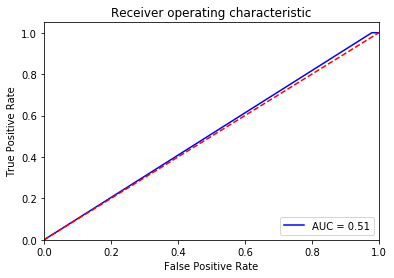

In [276]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# (b) (iii).(c.) Testing it on test data set 

In [293]:
import operator
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
accuracy_score_test = []
f1_score_res_test = []
recall_score_test = []
precision_score_test = []
auc_score_res_test = []
for i in range(1,31,1):
    random_val = randint(0, 42)
    random_state = randint(1, 10)
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    X_train = train_dataset.drop(columns=['Diag'])
    X_test = test_dataset.drop(columns=['Diag'])
    Y_test = test_dataset[['Diag']]
    Y_test['Diag'][Y_test.Diag == 'M'] = 1 
    Y_test['Diag'][Y_test.Diag == 'B'] = 0 
    y_arr_test = np.array(Y_test)
    y_true = []
    for i in range(len(y_arr_test)):
        y_true.append(int(y_arr_test[i]))
    kmeans = KMeans(n_clusters=2,random_state=random_state)
    clusters = kmeans.fit(X_train)
    centers = kmeans.cluster_centers_ #find the centroids 
    y_pred = kmeans.predict(X_test)
    true_label = Y_test[['Diag']].values
    tp=fp=tn=fn=0
    for i in range(len(true_label)):
        if true_label[i]==1 and y_pred[i]== 1:
            tp += 1
        elif true_label[i]==0 and y_pred[i]== 0:
            tn +=1
        elif true_label[i]==0 and y_pred[i]== 1:
            fp+=1
        else:
            fn+=1
    if(tp+tn+fp+fn!=0):
        accuracy = (tp+tn)/(tp+tn+fp+fn)
    else:
        accuracy = 0
    if(tp+fn!=0):
        recall = tp/(tp+fn)
    else:
        recall = 0
    if(tp+fp!=0):
        precision = tp/(tp+fp)
    else:
         precision = 0
    if(precision+recall != 0):
        f1_score = (2*recall*precision)/(precision + recall)
    else:
        fl_score = 0
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
    auc_score = roc_auc_score(y_true, y_pred)
    accuracy_score_test.append(accuracy)
    recall_score_test.append(recall)
    precision_score_test.append(precision)
    f1_score_res_test.append(f1_score)
    auc_score_res_test.append(auc_score)
    
        
    

# Accuracy Score : 

In [298]:
print("Accuracy scores for 30 runs : ")
print(accuracy_score_test)
print("Average accuracy scores for 30 runs : ")
print(sum(accuracy_score_test) / float(len(accuracy_score_test)))

Accuracy scores for 30 runs : 
[0.6086956521739131, 0.6173913043478261, 0.6260869565217392, 0.6260869565217392, 0.6086956521739131, 0.6260869565217392, 0.6347826086956522, 0.6260869565217392, 0.6260869565217392, 0.6173913043478261, 0.6173913043478261, 0.6347826086956522, 0.6086956521739131, 0.6260869565217392, 0.6260869565217392, 0.6086956521739131, 0.6347826086956522, 0.6260869565217392, 0.6434782608695652, 0.3391304347826087, 0.6173913043478261, 0.6260869565217392, 0.6086956521739131, 0.6260869565217392, 0.6608695652173913, 0.6260869565217392, 0.6260869565217392, 0.6434782608695652, 0.6434782608695652, 0.6347826086956522]
Average accuracy scores for 30 runs : 
0.6165217391304348


# Recall score :

In [299]:
print("recall for 30 runs : ")
print(recall_score_test)
print("Average recall scores for 30 runs : ")
print(sum(recall_score_test) / float(len(recall_score_test)))

recall for 30 runs : 
[0.023255813953488372, 0.023255813953488372, 0.0, 0.0, 0.023255813953488372, 0.0, 0.046511627906976744, 0.023255813953488372, 0.023255813953488372, 0.046511627906976744, 0.046511627906976744, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.0, 0.0, 0.046511627906976744, 0.0, 0.06976744186046512, 0.9069767441860465, 0.023255813953488372, 0.023255813953488372, 0.0, 0.0, 0.09302325581395349, 0.023255813953488372, 0.0, 0.046511627906976744, 0.09302325581395349, 0.023255813953488372]
Average recall scores for 30 runs : 
0.0558139534883721


# Precision score : 

In [300]:
print("Precision scores for 30 runs : ")
print(precision_score_test)
print("Average precision scores for 30 runs : ")
print(sum(precision_score_test) / float(len(precision_score_test)))

Precision scores for 30 runs : 
[0.25, 0.3333333333333333, 0, 0, 0.25, 0, 0.6666666666666666, 0.5, 0.5, 0.4, 0.4, 1.0, 0.25, 0.5, 0, 0.0, 0.6666666666666666, 0, 0.75, 0.35135135135135137, 0.3333333333333333, 0.5, 0.0, 0, 1.0, 0.5, 0, 1.0, 0.6666666666666666, 1.0]
Average precision scores for 30 runs : 
0.39393393393393394


# F1 Score : 


In [302]:
print("F1 scores for 30 runs : ")
print(f1_score_res_test)
print("Average accuracy scores for 30 runs : ")
print(sum(f1_score_res_test) / float(len(f1_score_res_test)))

F1 scores for 30 runs : 
[0.0425531914893617, 0.04347826086956522, 0.04347826086956522, 0.04347826086956522, 0.0425531914893617, 0.0425531914893617, 0.08695652173913045, 0.04444444444444444, 0.04444444444444444, 0.08333333333333333, 0.08333333333333333, 0.04545454545454545, 0.0425531914893617, 0.04444444444444444, 0.04444444444444444, 0.04444444444444444, 0.08695652173913045, 0.08695652173913045, 0.1276595744680851, 0.5064935064935064, 0.04347826086956522, 0.04444444444444444, 0.04444444444444444, 0.04444444444444444, 0.1702127659574468, 0.04444444444444444, 0.04444444444444444, 0.08888888888888888, 0.16326530612244897, 0.04545454545454545]
Average accuracy scores for 30 runs : 
0.07878452062012258


# AUC score : 

In [303]:
print("AUC scores for 30 runs : ")
print(auc_score_res_test)
print("Average AUC  scores for 30 runs : ")
print(sum(auc_score_res_test) / float(len(auc_score_res_test)))

AUC scores for 30 runs : 
[0.49079457364341089, 0.49773901808785531, 0.5, 0.5, 0.49079457364341089, 0.5, 0.51631136950904399, 0.50468346253229979, 0.50468346253229979, 0.50242248062015515, 0.50242248062015515, 0.51162790697674421, 0.49079457364341089, 0.50468346253229979, 0.5, 0.4861111111111111, 0.51631136950904399, 0.5, 0.52793927648578809, 0.45348837209302323, 0.49773901808785531, 0.50468346253229979, 0.4861111111111111, 0.5, 0.54651162790697672, 0.50468346253229979, 0.5, 0.52325581395348841, 0.53262273901808788, 0.51162790697674421]
Average AUC  scores for 30 runs : 
0.503601421189


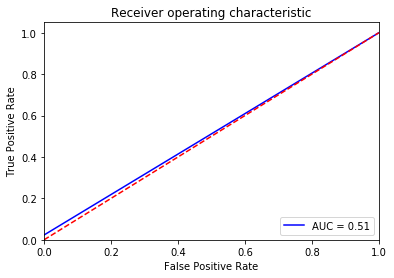

In [304]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [305]:
roc_curve(y_true, y_pred)

(array([ 0.,  1.]),
 array([ 0.02325581,  1.        ]),
 array([1, 0], dtype=int32))

In [307]:
confusion_matrix(y_true,y_pred)

array([[72,  0],
       [42,  1]])

# 1.(b.) (iv.)Spectral Clustering 

# Research what spectral clustering is : 
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.
Spectral clustering allows k-means to discover non-linear boundaries.
One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. 

# Spectral clustering for First and Second part : that is only on training data : 

In [327]:

import operator
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
accuracy_score_spectral = []
f1_score_res_spectral = []
recall_score_spectral = []
precision_score_spectral = []
auc_score_res_spectral = []
def dist(a, b, ax=0):
    return np.linalg.norm(a - b, axis=ax)
for i in range(1,31,1):
    random_val = randint(0, 42)
    random_state = randint(1, 10)
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    X_train = train_dataset.drop(columns=['Diag'])
    Y_train = train_dataset[['Diag']]
    Y_train['Diag'][Y_train.Diag == 'M'] = 1 
    Y_train['Diag'][Y_train.Diag == 'B'] = 0 
    kmeans = SpectralClustering(n_clusters=2, affinity='rbf',assign_labels='kmeans')
    #clusters = kmeans.fit(X_train)
    centers = kmeans.fit_predict(X_train) #find the centroids 
    c_1 = centers[0] #store the center 1 
    c_2 = centers[1] #store the center 2
    X = np.array(X_train)
    result_1 = {}
    result_2 = {}
    for i in range(0,len(X),1):   #calculate the distance of trainig set from each centroid 1 
        distances = dist(X[i], c_1)
        result_1.update({i:distances})
    for i in range(0,len(X),1):
        distances = dist(X[i], c_2)
        result_2.update({i:distances})
    sorted_x_1 = sorted(result_1.items(), key=operator.itemgetter(1)) #sort the distances 
    sorted_x_2 = sorted(result_2.items(), key=operator.itemgetter(1))
    indices_1 = []
    indices_2 = []
    index = 0
    for key,value in sorted_x_1:  #get the 30 nearest distances for each centroid. 
        if(index>29):
            break;
        else:
            indices_1.append(key)
            index = index + 1
    index = 0
    for key,value in sorted_x_2:
        if(index>29):
            break;
        else:
            indices_2.append(key)
            index = index + 1
    initial_labels = []
    y_arr = np.array(Y_train)
    for i in range(len(indices_1)):
        initial_labels.append(int(y_arr[i]))
    maj_centre_1 = max(set(initial_labels), key = initial_labels.count) 
    #got the majority class for 30 points for center 1
    initial_labels = []
    for i in range(len(indices_1)):
        initial_labels.append(int(y_arr[i]))
    maj_centre_2 = max(set(initial_labels), key = initial_labels.count) 
    #got the majority class for 30 points for center 2
    #calculate the indices of points belonging to their clusters 
    points_clusters = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
    flag = 0
    y_pred =  [0] * 454
    for key,value in points_clusters.items():
        points = value
        for i in range(len(points)):
            if(flag==0):
                y_pred[i] = maj_centre_1
            else:
                y_pred[i] = maj_centre_2
        flag=1
    true_label = Y_train[['Diag']].values
    y_arr_train = np.array(Y_train)
    y_true = []
    for i in range(len(y_arr_train)):
        y_true.append(int(y_arr_train[i]))
    tp=fp=tn=fn=0
    for i in range(len(X_train)):
        if true_label[i]==1 and y_pred[i]== 1:
            tp += 1
        elif true_label[i]==0 and y_pred[i]== 0:
            tn +=1
        elif true_label[i]==0 and y_pred[i]== 1:
            fp+=1
        else:
            fn+=1
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    f1_score = (2*recall*precision)/(precision + recall)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
    auc_score = roc_auc_score(y_true, y_pred)
    accuracy_score_spectral.append(accuracy)
    recall_score_spectral.append(recall)
    precision_score_spectral.append(precision)
    f1_score_res_spectral.append(f1_score)
    auc_score_res_spectral.append(auc_score)
    
        
    

# Accuracy Score : 

In [329]:
print("Accuracy scores for 30 runs : ")
print(accuracy_score_spectral)
print("Average accuracy  scores for 30 runs : ")
print(sum(accuracy_score_spectral) / float(len(accuracy_score_spectral)))

Accuracy scores for 30 runs : 
[0.5859030837004405, 0.5044052863436124, 0.7665198237885462, 0.4581497797356828, 0.8149779735682819, 0.6784140969162996, 0.5418502202643172, 0.45374449339207046, 0.473568281938326, 0.6321585903083701, 0.5770925110132159, 0.5198237885462555, 0.775330396475771, 0.6123348017621145, 0.7533039647577092, 0.486784140969163, 0.6145374449339207, 0.5352422907488987, 0.8083700440528634, 0.45154185022026433, 0.6718061674008811, 0.5814977973568282, 0.5066079295154186, 0.44273127753303965, 0.8193832599118943, 0.5110132158590308, 0.6894273127753304, 0.539647577092511, 0.8502202643171806, 0.48237885462555063]
Average accuracy  scores for 30 runs : 
0.6046255506607928


# Recall Score : 

In [330]:
print("Recall scores for 30 runs : ")
print(recall_score_spectral)
print("Average recall scores for 30 runs : ")
print(sum(recall_score_spectral) / float(len(recall_score_spectral)))

Recall scores for 30 runs : 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average recall scores for 30 runs : 
1.0


# Precision Score : 

In [331]:
print("Precision scores for 30 runs : ")
print(precision_score_spectral)
print("Average precision scores for 30 runs : ")
print(sum(precision_score_spectral) / float(len(precision_score_spectral)))

Precision scores for 30 runs : 
[0.4733893557422969, 0.4289340101522843, 0.6145454545454545, 0.4072289156626506, 0.6679841897233202, 0.5365079365079365, 0.4482758620689655, 0.4052757793764988, 0.41421568627450983, 0.5029761904761905, 0.46814404432132967, 0.43669250645994834, 0.6236162361623616, 0.48985507246376814, 0.6014234875444839, 0.42039800995024873, 0.49127906976744184, 0.44473684210526315, 0.66015625, 0.4043062200956938, 0.5314465408805031, 0.47075208913649025, 0.4300254452926209, 0.4004739336492891, 0.6733067729083665, 0.4322250639386189, 0.5451612903225806, 0.4470899470899471, 0.7130801687763713, 0.4183168316831683]
Average precision scores for 30 runs : 
0.5000606401026201


# F1 Score  

In [333]:
print("F1 scores for 30 runs : ")
print(f1_score_res_spectral)
print("Average F1 scores for 30 runs : ")
print(sum(f1_score_res_spectral) / float(len(f1_score_res_spectral)))

F1 scores for 30 runs : 
[0.6425855513307984, 0.6003552397868561, 0.7612612612612613, 0.5787671232876713, 0.8009478672985781, 0.6983471074380165, 0.6190476190476191, 0.5767918088737202, 0.58578856152513, 0.6693069306930693, 0.6377358490566039, 0.6079136690647482, 0.7681818181818182, 0.6575875486381323, 0.7511111111111111, 0.5919439579684763, 0.6588693957115009, 0.6156648451730419, 0.7952941176470588, 0.575809199318569, 0.6940451745379876, 0.6401515151515151, 0.601423487544484, 0.5719120135363791, 0.8047619047619048, 0.6035714285714285, 0.7056367432150313, 0.6179159049360147, 0.8325123152709359, 0.5898778359511344]
Average F1 scores for 30 runs : 
0.6618372968630198


# AUC Score : 

In [334]:
print("AUC scores for 30 runs : ")
print(auc_score_res_spectral)
print("Average AUC scores for 30 runs : ")
print(sum(auc_score_res_spectral) / float(len(auc_score_res_spectral)))

AUC scores for 30 runs : 
[0.6701754385964912, 0.60526315789473684, 0.81403508771929822, 0.56842105263157894, 0.85263157894736841, 0.743859649122807, 0.63508771929824559, 0.56491228070175437, 0.58070175438596494, 0.7070175438596491, 0.66315789473684217, 0.61754385964912273, 0.82105263157894737, 0.69122807017543852, 0.80350877192982462, 0.59122807017543866, 0.69298245614035081, 0.62982456140350873, 0.84736842105263155, 0.56315789473684208, 0.73859649122807025, 0.66666666666666674, 0.60701754385964912, 0.55614035087719293, 0.85614035087719298, 0.61052631578947369, 0.75263157894736843, 0.6333333333333333, 0.88070175438596499, 0.58771929824561409]
Average AUC scores for 30 runs : 
0.685087719298


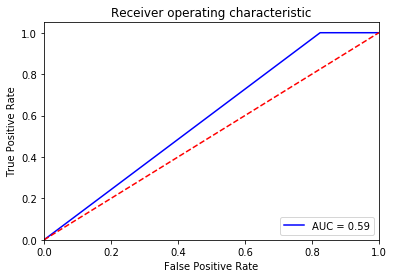

In [335]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [336]:
confusion_matrix(y_true,y_pred)

array([[ 50, 235],
       [  0, 169]])

# Spectral Clustering on test data : 

In [314]:

import operator
import warnings
from sklearn import metrics
from sklearn.cluster import SpectralClustering
warnings.filterwarnings('ignore')
accuracy_score_test_spectral = []
f1_score_res_test_spectral = []
recall_score_test_spectral = []
precision_score_test_spectral = []
auc_score_res_test_spectral = []
for i in range(1,31,1):
    random_val = randint(0, 42)
    random_state = randint(1, 10)
    train_malign, test_malign = train_test_split(malign_dataset, test_size=0.2,random_state=random_val)
    train_benign, test_benign = train_test_split(benign_dataset, test_size=0.2,random_state=random_val)
    train_dataset = train_malign.append(train_benign)
    test_dataset = test_malign.append(test_benign)
    X_train = train_dataset.drop(columns=['Diag'])
    X_test = test_dataset.drop(columns=['Diag'])
    Y_test = test_dataset[['Diag']]
    Y_test['Diag'][Y_test.Diag == 'M'] = 1 
    Y_test['Diag'][Y_test.Diag == 'B'] = 0 
    y_arr_test = np.array(Y_test)
    y_true = []
    for i in range(len(y_arr_test)):
        y_true.append(int(y_arr_test[i]))
    kmeans = SpectralClustering(n_clusters=2, affinity='rbf',assign_labels='kmeans')
    clusters = kmeans.fit(X_train)
    y_pred = kmeans.fit_predict(X_test)
    true_label = Y_test[['Diag']].values
    tp=fp=tn=fn=0
    for i in range(len(true_label)):
        if true_label[i]==1 and y_pred[i]== 1:
            tp += 1
        elif true_label[i]==0 and y_pred[i]== 0:
            tn +=1
        elif true_label[i]==0 and y_pred[i]== 1:
            fp+=1
        else:
            fn+=1
    if(tp+tn+fp+fn!=0):
        accuracy = (tp+tn)/(tp+tn+fp+fn)
    else:
        accuracy = 0
    if(tp+fn!=0):
        recall = tp/(tp+fn)
    else:
        recall = 0
    if(tp+fp!=0):
        precision = tp/(tp+fp)
    else:
         precision = 0
    if(precision+recall != 0):
        f1_score = (2*recall*precision)/(precision + recall)
    else:
        fl_score = 0
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
    auc_score = roc_auc_score(y_true, y_pred)
    accuracy_score_test_spectral.append(accuracy)
    recall_score_test_spectral.append(recall)
    precision_score_test_spectral.append(precision)
    f1_score_res_test_spectral.append(f1_score)
    auc_score_res_test_spectral.append(auc_score)
    
        
    

# Accuracy score : 

In [318]:
print("Accuracy scores for 30 runs : ")
print(accuracy_score_test_spectral)
print("Average accuracy  scores for 30 runs : ")
print(sum(accuracy_score_test_spectral) / float(len(accuracy_score_test_spectral)))

Accuracy scores for 30 runs : 
[0.43478260869565216, 0.45217391304347826, 0.6, 0.5565217391304348, 0.5217391304347826, 0.5043478260869565, 0.5043478260869565, 0.4434782608695652, 0.4782608695652174, 0.4608695652173913, 0.5652173913043478, 0.41739130434782606, 0.48695652173913045, 0.4782608695652174, 0.46956521739130436, 0.5565217391304348, 0.3826086956521739, 0.45217391304347826, 0.4956521739130435, 0.5739130434782609, 0.5565217391304348, 0.5826086956521739, 0.48695652173913045, 0.4434782608695652, 0.5652173913043478, 0.4, 0.5304347826086957, 0.4782608695652174, 0.5478260869565217, 0.5130434782608696]
Average accuracy  scores for 30 runs : 
0.4979710144927536


# Recall : 

In [319]:
print("Recall scores for 30 runs : ")
print(recall_score_test_spectral)
print("Average recall scores for 30 runs : ")
print(sum(recall_score_test_spectral) / float(len(recall_score_test_spectral)))

Recall scores for 30 runs : 
[0.6046511627906976, 0.4418604651162791, 0.2558139534883721, 0.37209302325581395, 0.2558139534883721, 0.32558139534883723, 0.6744186046511628, 0.5581395348837209, 0.37209302325581395, 0.3953488372093023, 0.4186046511627907, 0.3488372093023256, 0.3953488372093023, 0.6046511627906976, 0.7209302325581395, 0.3488372093023256, 0.6511627906976745, 0.6976744186046512, 0.5348837209302325, 0.3488372093023256, 0.627906976744186, 0.46511627906976744, 0.7441860465116279, 0.4186046511627907, 0.4883720930232558, 0.37209302325581395, 0.37209302325581395, 0.4883720930232558, 0.37209302325581395, 0.6046511627906976]
Average recall scores for 30 runs : 
0.475968992248062


# Precision

In [320]:
print("Precision scores for 30 runs : ")
print(precision_score_test_spectral)
print("Average precision  scores for 30 runs : ")
print(sum(precision_score_test_spectral) / float(len(precision_score_test_spectral)))

Precision scores for 30 runs : 
[0.35135135135135137, 0.3275862068965517, 0.44, 0.4, 0.3235294117647059, 0.3333333333333333, 0.4027777777777778, 0.34782608695652173, 0.32653061224489793, 0.32075471698113206, 0.4186046511627907, 0.2777777777777778, 0.34, 0.37681159420289856, 0.3875, 0.39473684210526316, 0.3333333333333333, 0.375, 0.3770491803278688, 0.4166666666666667, 0.43548387096774194, 0.4444444444444444, 0.4, 0.3157894736842105, 0.42857142857142855, 0.27586206896551724, 0.37209302325581395, 0.3559322033898305, 0.3902439024390244, 0.4]
Average precision  scores for 30 runs : 
0.3696529986200295


# F1-score

In [321]:
print("F1 scores for 30 runs : ")
print(f1_score_res_test_spectral)
print("Average F1  scores for 30 runs : ")
print(sum(f1_score_res_test_spectral) / float(len(f1_score_res_test_spectral)))

F1 scores for 30 runs : 
[0.4444444444444445, 0.37623762376237624, 0.3235294117647059, 0.38554216867469876, 0.28571428571428575, 0.3294117647058823, 0.5043478260869566, 0.42857142857142855, 0.34782608695652173, 0.3541666666666667, 0.4186046511627907, 0.3092783505154639, 0.3655913978494624, 0.46428571428571425, 0.5040650406504065, 0.3703703703703704, 0.4409448818897638, 0.4878048780487806, 0.4423076923076923, 0.379746835443038, 0.5142857142857142, 0.4545454545454546, 0.5203252032520326, 0.36, 0.45652173913043476, 0.31683168316831684, 0.3720930232558139, 0.411764705882353, 0.380952380952381, 0.48148148148148145]
Average F1  scores for 30 runs : 
0.40771976352751443


# AUC score : 

In [322]:
print("AUC scores for 30 runs : ")
print(auc_score_res_test_spectral)
print("Average AUC scores for 30 runs : ")
print(sum(auc_score_res_test_spectral) / float(len(auc_score_res_test_spectral)))

AUC scores for 30 runs : 
[0.4689922480620155, 0.45009689922480617, 0.53068475452196384, 0.51937984496124034, 0.46818475452196384, 0.46834625322997425, 0.53859819121447028, 0.46656976744186052, 0.45687984496124034, 0.44767441860465118, 0.53569121447028423, 0.40358527131782945, 0.46850775193798455, 0.50371447028423777, 0.52018733850129195, 0.51469638242894056, 0.43669250645994839, 0.50161498708010333, 0.50355297157622736, 0.5285852713178294, 0.57089793281653745, 0.55894702842377253, 0.53875968992248069, 0.43846899224806202, 0.54974160206718348, 0.39437984496124023, 0.49854651162790697, 0.480297157622739, 0.51243540051679581, 0.53149224806201556]
Average AUC scores for 30 runs : 
0.49354005168


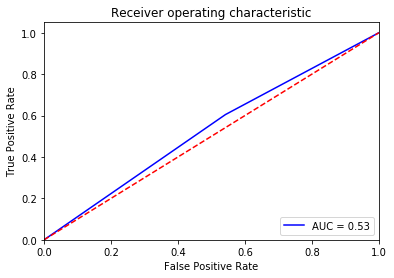

In [323]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [324]:
confusion_matrix(y_true,y_pred)

array([[33, 39],
       [17, 26]])

# 1.(b.) (v. ) 
1. Semi-supervised learning performed better than supervised. 
2. And unsupervised performed the worst among supervised and semi-supervised. 